In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from numpy import pi

# $|{\phi_1}\rangle$

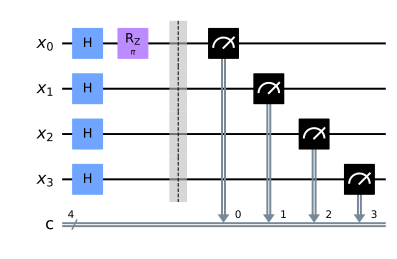

In [2]:
x = QuantumRegister(4, name="x")
c = ClassicalRegister(4, name="c")
qc = QuantumCircuit(x, c)

qc.h(x)
qc.rz(pi, x[0])

qc.barrier()

qc.measure(x, c)

qc.draw()

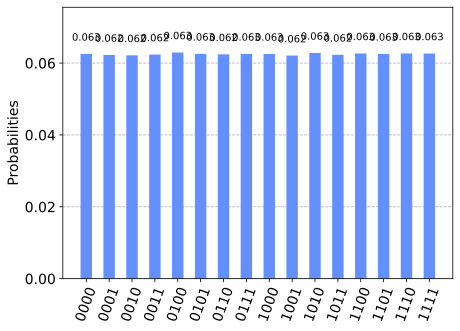

In [3]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# $|{\phi_2}\rangle$

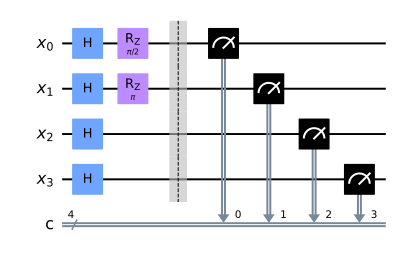

In [4]:
x = QuantumRegister(4, name="x")
c = ClassicalRegister(4, name="c")
qc = QuantumCircuit(x, c)

qc.h(x)
qc.rz(pi/2, x[0])
qc.rz(pi, x[1])

qc.barrier()

qc.measure(x, c)

qc.draw()

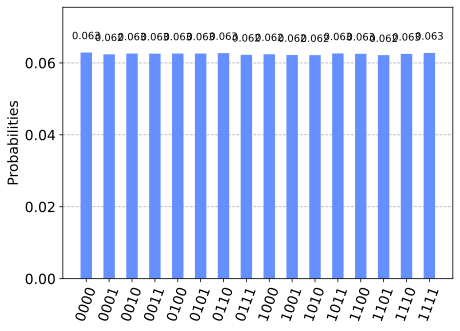

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# $|{\phi_3}\rangle$

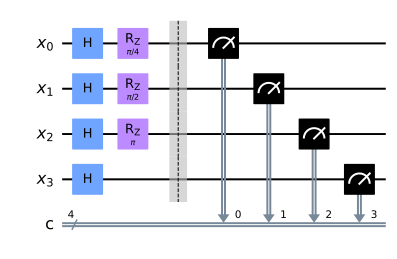

In [6]:
x = QuantumRegister(4, name="x")
c = ClassicalRegister(4, name="c")
qc = QuantumCircuit(x, c)

qc.h(x)
qc.rz(pi/4, x[0])
qc.rz(pi/2, x[1])
qc.rz(pi, x[2])

qc.barrier()

qc.measure(x, c)

qc.draw()

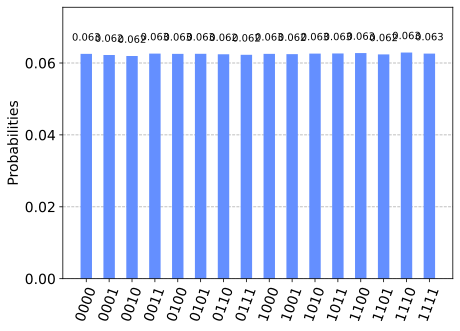

In [7]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## All of them look the same.

In [8]:
def qft_dagger(qc, n):
# qc = QuantumCircuit(n)
# Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT_dagger"
    return qc

# $\text{QFT}^\dagger |{\phi_1}\rangle$

/var/folders/1s/h26s0qxx3_b3r_s010t_9dyc0000gn/T/ipykernel_20968/1955364682.py:8: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-pi/float(2**(j-m)), m, j)


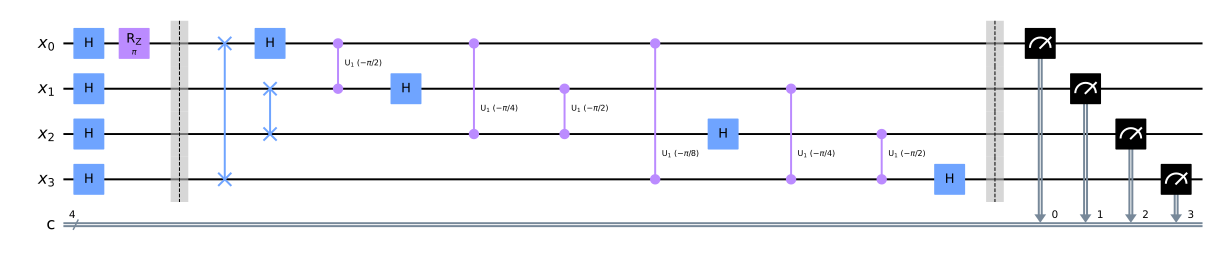

In [9]:
n = 4
x = QuantumRegister(n, name="x")
c = ClassicalRegister(n, name="c")
qc = QuantumCircuit(x, c)

qc.h(x)
qc.rz(pi, x[0])

qc.barrier()

qft_dagger(qc, n)

qc.barrier()

qc.measure(x, c)

qc.draw()

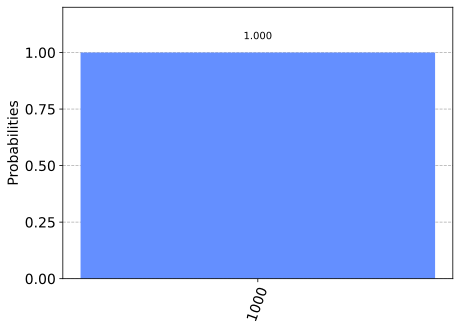

In [10]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# $\text{QFT}^\dagger |{\phi_2}\rangle$

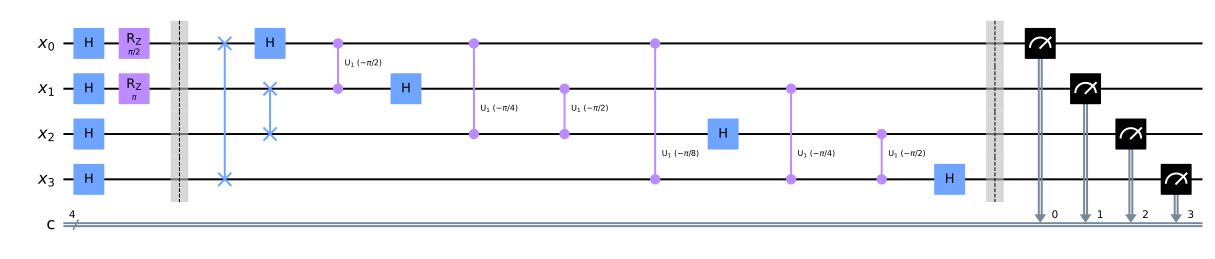

In [11]:
n = 4
x = QuantumRegister(n, name="x")
c = ClassicalRegister(n, name="c")
qc = QuantumCircuit(x, c)

qc.h(x)
qc.rz(pi/2, x[0])
qc.rz(pi, x[1])

qc.barrier()

qft_dagger(qc, n)

qc.barrier()

qc.measure(x, c)

qc.draw()

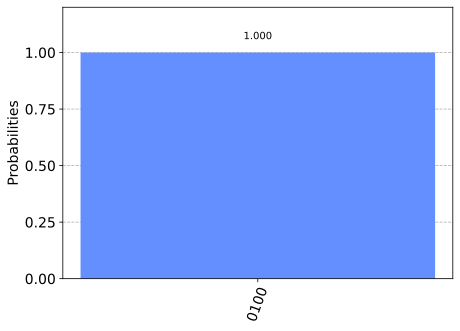

In [12]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# $\text{QFT}^\dagger |{\phi_3}\rangle$

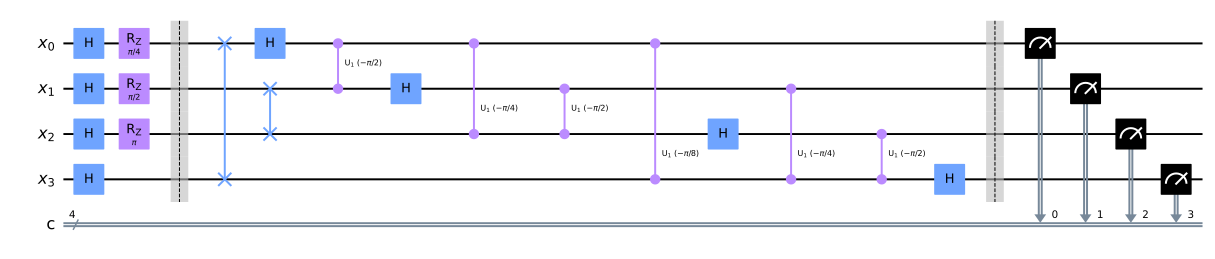

In [13]:
n = 4
x = QuantumRegister(n, name="x")
c = ClassicalRegister(n, name="c")
qc = QuantumCircuit(x, c)

qc.h(x)
qc.rz(pi/4, x[0])
qc.rz(pi/2, x[1])
qc.rz(pi, x[2])

qc.barrier()

qft_dagger(qc, n)

qc.barrier()

qc.measure(x, c)

qc.draw()

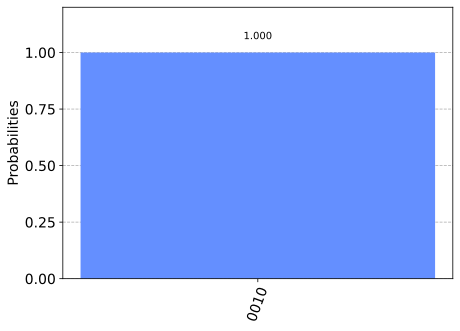

In [14]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)